In [ ]:
!pip install vaderSentiment

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Assuming the file path is correct
file_path = "/content/data_airline_reviews.xlsx"
# Read the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)
# Now you can work with the 'data' DataFrame as needed

In [4]:
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data=data.dropna()

In [6]:
data

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131676,Ukraine International,6.0,A Dunduras,10th October 2015,Ukraine International it isn't for everyone. I...,Boeing 767,Solo Leisure,Economy Class,JFK to VNO via KBP,September 2015,2.0,4.0,2.0,1.0,4.0,5.0,yes
131680,Ukraine International,7.0,Filip Badziak,6th October 2015,"Warsaw to Kiev the plane was on time, Kiev air...",Boeing 767,Couple Leisure,Economy Class,WAW to BKK via KBP,January 2015,2.0,2.0,2.0,1.0,2.0,5.0,yes
131696,Ukraine International,1.0,Nataliya Vasylkevych,6th August 2015,Never flying them again and discourage anyone ...,Boeing,Family Leisure,Economy Class,New York to Lviv,July 2015,1.0,1.0,1.0,1.0,1.0,1.0,no
131702,Ukraine International,10.0,Oleksii Maksimov,20th July 2015,Clean and comfortable cabin. We were offered a...,Boeing 737,Couple Leisure,Economy Class,KBP to RIX,July 2015,5.0,5.0,5.0,4.0,4.0,4.0,yes


In [7]:
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [8]:
data=data.reset_index(drop="index")

In [9]:
data.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


In [10]:
working_df=data.copy()

In [11]:
working_df = working_df.drop(columns=['author', 'review_date', 'route', 'date_flown', 'aircraft', 'traveller_type','airline', 'cabin'], axis=1)


<Axes: >

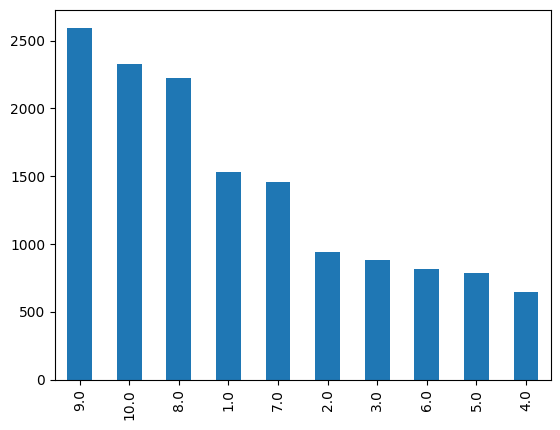

In [12]:
working_df['overall'].value_counts().plot(kind='bar')

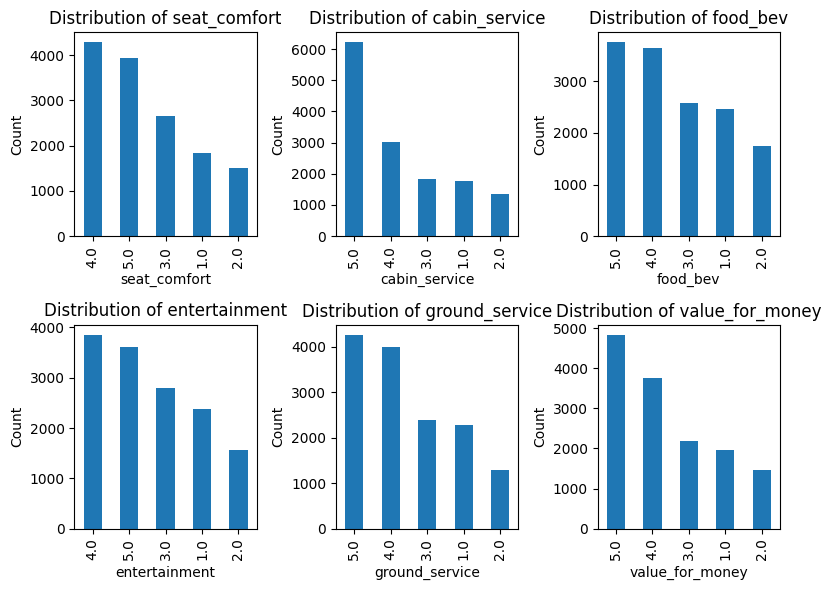

In [13]:


cols = ['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for i, col in enumerate(cols):
    ax = axes.flatten()[i]
    working_df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [14]:
working_df

,overall,customer_review,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,2.0,âœ… Trip Verified | Basel to Cape Town via Ist...,3.0,3.0,2.0,3.0,1.0,2.0,no
2,6.0,Not Verified | Abu Dhabi to Luxembourg via Ist...,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,1.0,âœ… Trip Verified | The experience with Turkis...,1.0,1.0,1.0,1.0,1.0,1.0,no
4,2.0,âœ… Trip Verified | Houston to Kiev via Istanb...,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...
14207,6.0,Ukraine International it isn't for everyone. I...,2.0,4.0,2.0,1.0,4.0,5.0,yes
14208,7.0,"Warsaw to Kiev the plane was on time, Kiev air...",2.0,2.0,2.0,1.0,2.0,5.0,yes
14209,1.0,Never flying them again and discourage anyone ...,1.0,1.0,1.0,1.0,1.0,1.0,no
14210,10.0,Clean and comfortable cabin. We were offered a...,5.0,5.0,5.0,4.0,4.0,4.0,yes


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

import re
from nltk.stem import PorterStemmer, WordNetLemmatizer  # Import stemmer/lemmatizer
nltk.download('wordnet')

def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', 'NUMBER', text)  # Normalize numbers (optional, adapt as needed)
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stop words

    # Choose stemming or lemmatization based on your needs:
    # stemmer = PorterStemmer()
    # text = ' '.join([stemmer.stem(word) for word in text.split()])
    lemmatizer = WordNetLemmatizer()  # Lemmatization often preferred for sentiment
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    analyzer = SentimentIntensityAnalyzer()
    score=analyzer.polarity_scores(text)['compound']

    # Handle emojis, hashtags, and URLs (implement based on your needs):
    # ... (Add code for handling emojis, hashtags, URLs as desired)

    return score


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
working_df['review setiment']= working_df['customer_review'].apply(preprocess_text)

In [17]:
working_df=working_df.drop(columns=['customer_review'])

In [18]:
working_df.isnull().sum()

overall            0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
review setiment    0
dtype: int64

In [19]:
working_df

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review setiment
0,10.0,4.0,5.0,5.0,5.0,5.0,5.0,yes,0.9810
1,2.0,3.0,3.0,2.0,3.0,1.0,2.0,no,-0.5672
2,6.0,2.0,3.0,3.0,3.0,3.0,3.0,yes,0.9009
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,0.3048
4,2.0,1.0,3.0,2.0,2.0,1.0,1.0,no,0.8700
...,...,...,...,...,...,...,...,...,...
14207,6.0,2.0,4.0,2.0,1.0,4.0,5.0,yes,0.9956
14208,7.0,2.0,2.0,2.0,1.0,2.0,5.0,yes,0.9464
14209,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,0.8900
14210,10.0,5.0,5.0,5.0,4.0,4.0,4.0,yes,0.9477


In [20]:
working_df['recommended']=working_df['recommended'].map({'yes':1,'no':0})

In [21]:
working_df

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review setiment
0,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0.9810
1,2.0,3.0,3.0,2.0,3.0,1.0,2.0,0,-0.5672
2,6.0,2.0,3.0,3.0,3.0,3.0,3.0,1,0.9009
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.3048
4,2.0,1.0,3.0,2.0,2.0,1.0,1.0,0,0.8700
...,...,...,...,...,...,...,...,...,...
14207,6.0,2.0,4.0,2.0,1.0,4.0,5.0,1,0.9956
14208,7.0,2.0,2.0,2.0,1.0,2.0,5.0,1,0.9464
14209,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0.8900
14210,10.0,5.0,5.0,5.0,4.0,4.0,4.0,1,0.9477


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df=scaler.fit_transform(working_df)



In [23]:
scaled_df

array([[ 1.15285168,  0.37959241,  0.88728056, ...,  1.02346291,
         0.70785323,  0.59288884],
       [-1.46927012, -0.36853786, -0.52410579, ..., -1.11546972,
        -1.41272225, -2.20874398],
       [-0.15820922, -1.11666813, -0.52410579, ..., -0.40249218,
         0.70785323,  0.44793936],
       ...,
       [-1.79703534, -1.8647984 , -1.93549214, ..., -1.82844726,
        -1.41272225,  0.42821465],
       [ 1.15285168,  1.12772268,  0.88728056, ...,  0.31048537,
         0.70785323,  0.53262894],
       [-0.48597444, -1.8647984 , -1.93549214, ...,  1.02346291,
        -1.41272225, -2.89241333]])

In [24]:
X=working_df[['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money','review setiment']]

In [25]:
y=working_df['recommended']

In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model=LogisticRegression()

In [28]:
model=model.fit(X_train,y_train)

In [29]:
y_pred=model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

# Assuming you have predictions (y_pred) for the test set and the true labels (y_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9556806190643686


In [39]:
def predict_recommendation(review_text, overall_rating, seat_comfort, cabin_service, food_bev, entertainment, ground_service, value_for_money):
    # Preprocess the review text
    processed_text = preprocess_text(review_text)

    # Create a DataFrame with the extracted features
    new_review_df = pd.DataFrame({
        'overall': [overall_rating],
        'seat_comfort': [seat_comfort],
        'cabin_service': [cabin_service],
        'food_bev': [food_bev],
        'entertainment': [entertainment],
        'ground_service': [ground_service],
        'value_for_money': [value_for_money],
        'review setiment': [processed_text]
    })

    # Predict recommendation using the trained model
    recommendation = model.predict(new_review_df)[0]

    if recommendation == 1:
        return "likely to be recommended."
    else:
        return "not likely to be recommended."

# Example usage:



In [40]:
new_review_text = "worst flight ever, the staff was not friendly"
predicted_recommendation = predict_recommendation(new_review_text, overall_rating=3, seat_comfort=2, cabin_service=0, food_bev=4, entertainment=2, ground_service=1, value_for_money=5)
print(predicted_recommendation)

not likely to be recommended.
